In [95]:
import math
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [96]:
def count_ones(binary_array):
    count = 0
    for bit in binary_array:
        if bit == 1:
            count += 1
    return count

def string_to_array(input_string):
    # Split the string by the delimiter (assuming comma separated values)
    array_strings = input_string.strip('[]').split(',')

    # Convert each string element into an integer
    array = [float(x) for x in array_strings]

    return array

def get_num_features(string_individual):
    ind = string_to_array(string_individual)
    num_features = count_ones(ind)
    return num_features

In [115]:
def plot_multiple_points(arrays):
    # Plots points from each array in the input array, with those points being
    # the y-axis and its indexes the x-axis
    # Args
    #     array -> Array of arrays with numeric values. Size of each inside
    #              array can vary
    # Returns
    #     fig -> Graph with information
    fig = px.scatter(title='Points with Varying Colors')

    for i, array in enumerate(arrays):
        indices = np.arange(len(array))

        df = pd.DataFrame({'Index': indices, 'Value': array})
        fig.add_trace(px.scatter(df, x='Index', y='Value', color='Index',
                                 color_continuous_scale=px.colors.sequential.Plotly3).data[0])

        fig.update_layout(title='Curvas de Evolução do Fitness Médio Para Cada Execução',
                      xaxis_title='Épocas',
                      yaxis_title='Fitness Médio')

    return fig

def plot_dataframes(dataframes, column, y_label, title):
    """
    Plot the 'value' column from multiple dataframes on the same plot.

    Parameters:
    dataframes (list): A list of pandas DataFrames, each containing the 'value' column.
    """
    # Plotting the data
    labels = ['ga', 'pso', 'woa', 'rda_mod3']
    for i, df in enumerate(dataframes):
        plt.plot(df.index, df[column], label=labels[i])

    # Adding labels and legend
    plt.xlabel('Iterações')
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

    # Displaying the plot
    plt.show()

def plot_boxplot(csv_paths, feature_column='feature', title='Box Plot of Features', xlabel='CSV Files', ylabel='Feature Values'):
    # Load the CSV files and extract feature columns
    data = {}

    for i, csv_path in enumerate(csv_paths):
        csv_data = pd.read_csv(csv_path)
        splits = csv_path.split('/')
        splits = splits[-1].split('_')
        alg = splits[0]
        if i > 3:
          alg = f'rda_mod{i - 3}'
        data[alg] = csv_data[feature_column]

    # Create DataFrame
    combined_data = pd.DataFrame(data)

    # Create box plot
    combined_data.boxplot()

    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the plot
    plt.show()

def process_and_plot_boxplot(*dfs):
    # Define your function
    def get_num_features(string_individual):
        ind = string_to_array(string_individual)
        num_features = count_ones(ind)
        return num_features

    # Apply the function to each DataFrame
    for df in dfs:
        df['num_features_best'] = df['best_agent'].apply(get_num_features)

    models = ['ga', 'pso', 'woa', 'rda', 'rda_mod1', 'rda_mod2', 'rda_mod3', 'rda_mod4']
    # Concatenate DataFrames
    concatenated_df = pd.concat(dfs, keys=models)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Extract data for plotting
    data = [concatenated_df.loc[key, 'num_features_best'].values for key in concatenated_df.index.levels[0]]

    # Creating box plot
    plt.boxplot(data, labels=concatenated_df.index.levels[0])

    plt.xlabel('Algorithms')
    plt.ylabel('N')
    plt.title('Number of Features')
    plt.grid(True)
    plt.show()

In [98]:
# Change those paths to the respective ones and use the above functions to visualize the information you need
GA_csv_path = '/content/ga_hill.csv'
PSO_csv_path ='/content/pso_hill.csv'
WOA_csv_path = '/content/woa_hill.csv'
RDA_csv_path = '/content/rda_hill.csv'
RDA_mod_csv_path = '/content/rda_mod_hill.csv'
RDA_mod2_csv_path = '/content/rda_mod2_hill.csv'
RDA_mod3_csv_path = '/content/rda_mod3_hill.csv'
RDA_mod4_csv_path = '/content/rda_mod4_hill.csv'
df_ga = pd.read_csv(GA_csv_path)
df_pso = pd.read_csv(PSO_csv_path)
df_woa = pd.read_csv(WOA_csv_path)
df_rda = pd.read_csv(RDA_csv_path)
df_rda_mod = pd.read_csv(RDA_mod_csv_path)
df_rda_mod2 = pd.read_csv(RDA_mod2_csv_path)
df_rda_mod3 = pd.read_csv(RDA_mod3_csv_path)
df_rda_mod4 = pd.read_csv(RDA_mod4_csv_path)
df_ga

,num_features,num_agents,max_iter,execution_time,convergence_curve,best_agent,best_fitness,best_accuracy,final_population,final_fitness,final_accuracy
0,100,20,100,5.476002,"[0.5768523255813953, 0.577653488372093, 0.5788...","[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.652047,0.651163,"[[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0,...","[0.6520465116279069, 0.640046511627907, 0.6350...","[0.6511627906976745, 0.6511627906976745, 0.643..."
1,100,20,100,5.621086,"[0.5326162790697674, 0.5340534883720929, 0.536...","[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",0.594209,0.596899,"[[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0,...","[0.5942093023255813, 0.5902093023255814, 0.579...","[0.5968992248062015, 0.5968992248062015, 0.589..."
2,100,20,100,5.572322,"[0.5568325581395349, 0.5593686046511627, 0.560...","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",0.610163,0.612403,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.6101627906976743, 0.6081395348837209, 0.607...","[0.6201550387596899, 0.6124031007751938, 0.612..."
3,100,20,100,5.429193,"[0.5510941860465117, 0.5541337209302325, 0.555...","[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",0.631093,0.635659,"[[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0,...","[0.631093023255814, 0.6061627906976743, 0.6031...","[0.6356589147286822, 0.6124031007751938, 0.604..."
4,100,20,100,5.771171,"[0.5891279069767441, 0.5904186046511626, 0.591...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...",0.653000,0.666667,"[[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0,...","[0.653, 0.6360697674418605, 0.6360697674418605...","[0.6666666666666666, 0.6434108527131783, 0.643..."
5,100,20,100,5.931331,"[0.5906162790697673, 0.593653488372093, 0.5943...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",0.644070,0.643411,"[[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0,...","[0.6440697674418605, 0.6380697674418605, 0.632...","[0.6434108527131783, 0.6434108527131783, 0.643..."
6,100,20,100,5.857158,"[0.5803976744186047, 0.5820930232558139, 0.582...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, ...",0.635047,0.651163,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0,...","[0.6350465116279069, 0.6310697674418606, 0.629...","[0.6511627906976745, 0.6434108527131783, 0.635..."
7,100,20,100,5.607831,"[0.533653488372093, 0.5356941860465116, 0.5381...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0.586279,0.573643,"[[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[0.5862790697674418, 0.5822558139534884, 0.580...","[0.5813953488372093, 0.5813953488372093, 0.573..."
8,100,20,100,5.630804,"[0.5387860465116279, 0.5411267441860466, 0.542...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",0.595209,0.596899,"[[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0,...","[0.5952093023255813, 0.5892093023255813, 0.577...","[0.5968992248062015, 0.5968992248062015, 0.581..."
9,100,20,100,5.767462,"[0.5780011627906977, 0.5791488372093022, 0.580...","[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.634070,0.643411,"[[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...","[0.6340697674418605, 0.6191395348837209, 0.617...","[0.6434108527131783, 0.6201550387596899, 0.620..."


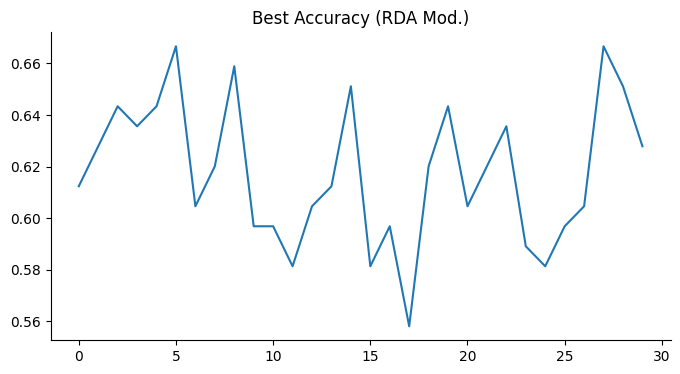

In [99]:
# @title Best Accuracy

df_rda_mod['best_accuracy'].plot(kind='line', figsize=(8, 4), title='Best Accuracy (RDA Mod.)')
plt.gca().spines[['top', 'right']].set_visible(False)

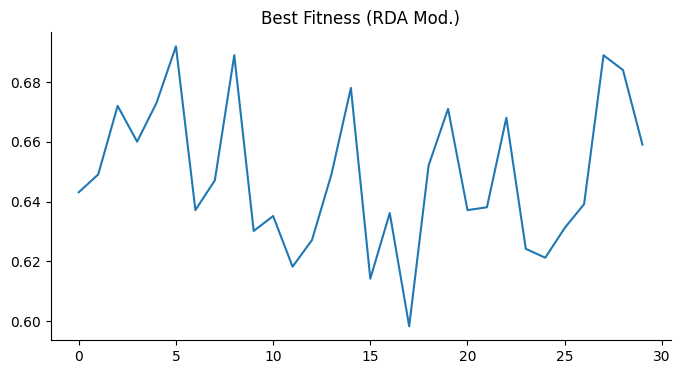

In [100]:
# @title Best Fitness

df_rda_mod['best_fitness'].plot(kind='line', figsize=(8, 4), title='Best Fitness (RDA Mod.)')
plt.gca().spines[['top', 'right']].set_visible(False)

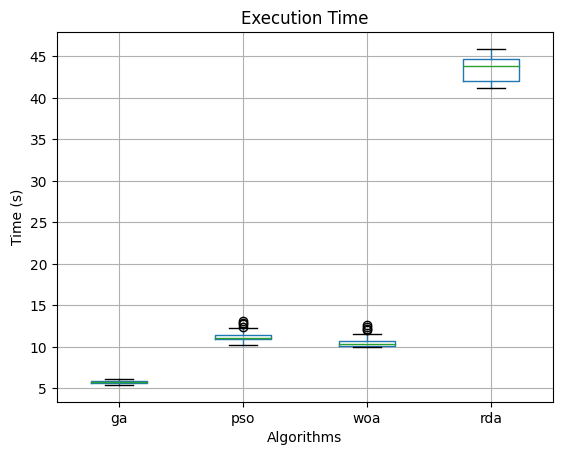

In [101]:
# @title Box Plots Execution Time
csv_paths = ['/content/ga_hill.csv', '/content/pso_hill.csv', '/content/woa_hill.csv', '/content/rda_hill.csv']
plot_boxplot(csv_paths, 'execution_time', 'Execution Time', 'Algorithms', 'Time (s)')

In [110]:
# @title CUZIL ZIL ZIL
avg_fit_curves = []
for str_avg_fit_curve in df_rda_mod4['convergence_curve']:
  avg_fit_curve = string_to_array(str_avg_fit_curve)
  avg_fit_curves.append(avg_fit_curve)

avg_fit_curves = plot_multiple_points(avg_fit_curves)
avg_fit_curves.show()

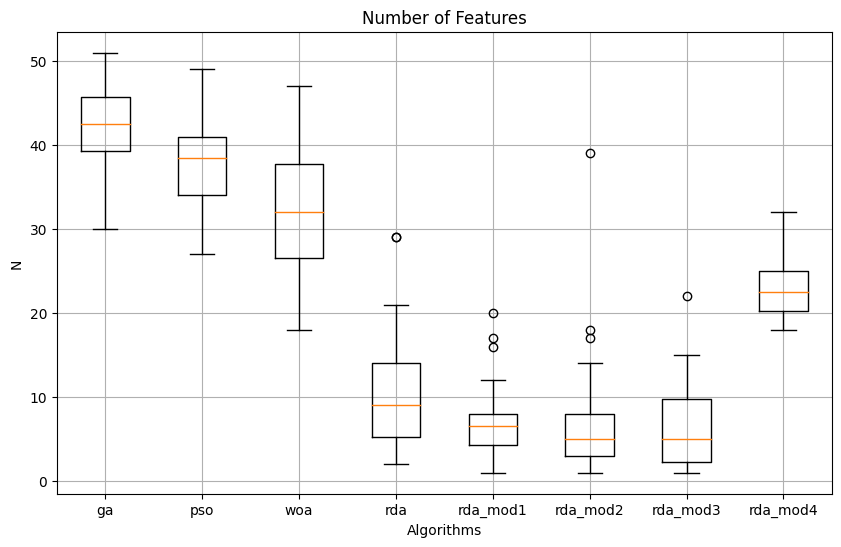

In [103]:
process_and_plot_boxplot(df_ga, df_pso, df_woa, df_rda, df_rda_mod, df_rda_mod2, df_rda_mod3, df_rda_mod4)

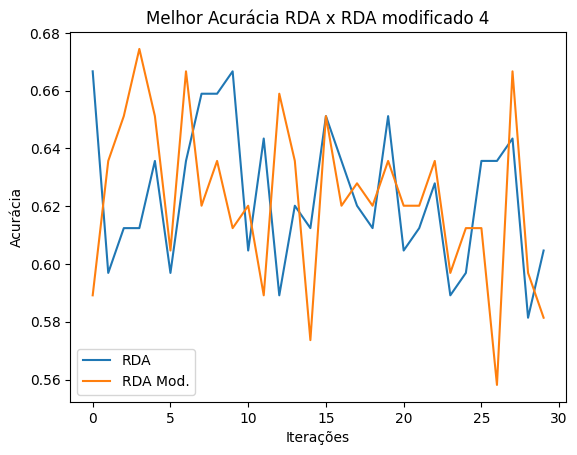

In [104]:
plot_dataframes([df_rda, df_rda_mod4], 'best_accuracy', 'Acurácia', 'Melhor Acurácia RDA x RDA modificado 4')

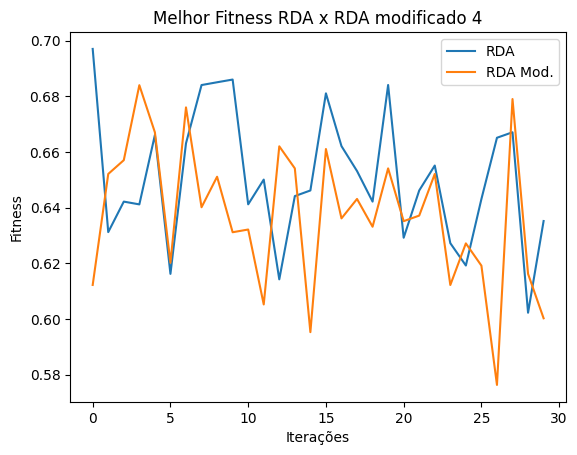

In [105]:
plot_dataframes([df_rda, df_rda_mod4], 'best_fitness', 'Fitness', 'Melhor Fitness RDA x RDA modificado 4')

In [106]:
average = df_rda['best_accuracy'].mean()
std_deviation = df_rda['best_accuracy'].std()

print("Average (RDA):", average)
print("Standard Deviation (RDA):", std_deviation)

Average (RDA): 0.6237726098191215
Standard Deviation (RDA): 0.024406473765593996


In [107]:
average = df_rda_mod4['best_accuracy'].mean()
std_deviation = df_rda_mod4['best_accuracy'].std()

print("Average (RDA Mod.):", average)
print("Standard Deviation (RDA Mod.):", std_deviation)

Average (RDA Mod.): 0.6224806201550387
Standard Deviation (RDA Mod.): 0.02858411031581353


In [108]:
average = df_rda['best_fitness'].mean()
std_deviation = df_rda['best_fitness'].std()

print("Average (RDA):", average)
print("Standard Deviation (RDA):", std_deviation)

Average (RDA): 0.6506620155038759
Standard Deviation (RDA): 0.02399275962142031


In [109]:
average = df_rda_mod4['best_fitness'].mean()
std_deviation = df_rda_mod4['best_fitness'].std()

print("Average (RDA Mod. ):", average)
print("Standard Deviation (RDA Mod.):", std_deviation)

Average (RDA Mod. ): 0.6373992248062016
Standard Deviation (RDA Mod.): 0.025929585676198158


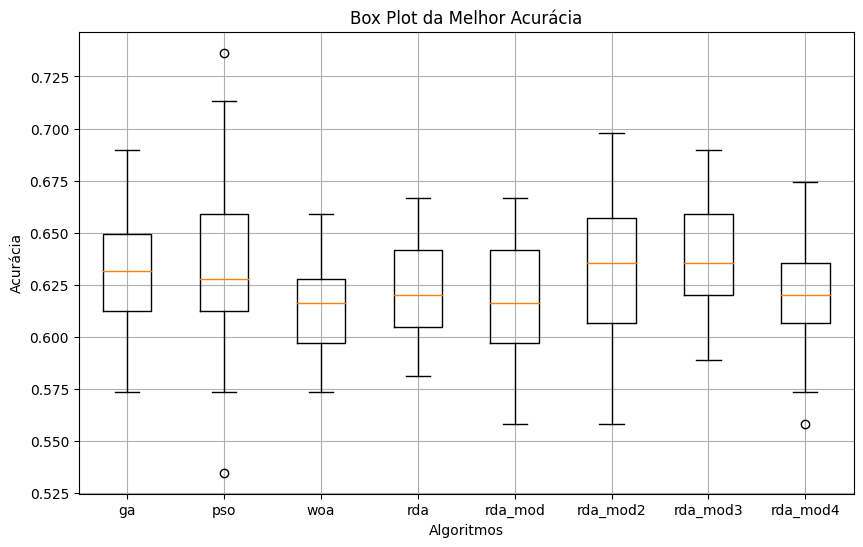

In [122]:
def plot_multiple_boxplots(dataframes, labels=None, figsize=(10, 6)):
    """
    Plot box plots for the 'value' column from multiple DataFrames.

    Parameters:
        dataframes (list): List of pandas DataFrames.
        labels (list, optional): List of labels for each box plot.
        figsize (tuple, optional): Figure size (width, height) in inches.

    Returns:
        None
    """
    # Plotting
    plt.figure(figsize=figsize)
    plt.boxplot([df['best_accuracy'] for df in dataframes], labels=labels)
    plt.title('Box Plot da Melhor Acurácia')
    plt.xlabel('Algoritmos')
    plt.ylabel('Acurácia')
    plt.grid(True)
    plt.show()

# Combine DataFrames into a list
dfs = [df_ga, df_pso, df_woa, df_rda, df_rda_mod, df_rda_mod2, df_rda_mod3, df_rda_mod4]

# Create a list of labels for each box plot
labels = ['ga', 'pso', 'woa', 'rda', 'rda_mod', 'rda_mod2', 'rda_mod3', 'rda_mod4']

# Call the function
plot_multiple_boxplots(dfs, labels)
